In [24]:
!kaggle datasets download -d himanshuwagh/spotify-million

Dataset URL: https://www.kaggle.com/datasets/himanshuwagh/spotify-million
License(s): unknown
spotify-million.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
!unzip spotify-million.zip

Archive:  spotify-million.zip
replace README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [26]:
import json
import pandas as pd
json_files = [f'data/mpd.slice.{i*1000}-{i*1000+999}.json' for i in range(50)]
# Initialize an empty list to store track data
track_rows = []

# Iterate through the list of JSON files
for file in json_files:
    try:
        # Open and load the JSON file
        with open(file, 'r') as f:
            data = json.load(f)

        # Get the playlists from the JSON data
        playlists = data.get("playlists", [])

        # Iterate through each playlist
        for playlist in playlists:
            # Iterate through each track in the playlist
            for track in playlist.get("tracks", []):
                # Create a dictionary for the track's information
                track_row = {
                    "playlist_name": playlist.get("name", ""),
                    "collaborative": playlist.get("collaborative", ""),
                    "modified_at": playlist.get("modified_at", ""),
                    "num_tracks": playlist.get("num_tracks", 0),
                    "num_albums": playlist.get("num_albums", 0),
                    "num_followers": playlist.get("num_followers", 0),
                    "num_edits": playlist.get("num_edits", 0),
                    "track_pos": track.get("pos", 0),
                    "artist_name": track.get("artist_name", ""),
                    "album_uri": track.get("album_uri", ""),
                    "album_name": track.get("album_name", ""),
                    "artist_uri": track.get("artist_uri", ""),
                    "track_name": track.get("track_name", ""),
                    "track_uri": track.get("track_uri", ""),
                    "duration_ms": track.get("duration_ms", 0),
                    "num_artists": playlist.get("num_artists", 0),
                }

                # Append the track's information to the list
                track_rows.append(track_row)

    except (json.JSONDecodeError, IOError) as e:
        print(f"Error processing file {file}: {e}")

# Create a DataFrame from the list of track data
df = pd.DataFrame(track_rows)

# Save the DataFrame to a CSV file
csv_file = 'spotify_data.csv'
df.to_csv(csv_file, index=False)

print(f"CSV file has been created successfully: {csv_file}")


CSV file has been created successfully: spotify_data.csv


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data=pd.read_csv("spotify_data.csv")
data

,playlist_name,collaborative,modified_at,num_tracks,num_albums,num_followers,num_edits,track_pos,artist_name,album_uri,album_name,artist_uri,track_name,track_uri,duration_ms,num_artists
0,Throwbacks,False,1493424000,52,47,1,6,0,Missy Elliott,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,226863,37
1,Throwbacks,False,1493424000,52,47,1,6,1,Britney Spears,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,In The Zone,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,198800,37
2,Throwbacks,False,1493424000,52,47,1,6,2,Beyoncé,spotify:album:25hVFAxTlDvXbx2X2QkUkE,Dangerously In Love (Alben für die Ewigkeit),spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,235933,37
3,Throwbacks,False,1493424000,52,47,1,6,3,Justin Timberlake,spotify:album:6QPkyl04rXwTGlGlcYaRoW,Justified,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:track:1AWQoqb9bSvzTjaLralEkT,267266,37
4,Throwbacks,False,1493424000,52,47,1,6,4,Shaggy,spotify:album:6NmFmPX56pcLBOFMhIiKvF,Hot Shot,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:track:1lzr43nnXAijIGYnCT8M8H,227600,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344369,BOOL,False,1488412800,11,9,1,5,6,Kirko Bangz,spotify:album:7tivRA9WDD0rWVazWm2pFS,Drank In My Cup,spotify:artist:2r8r62VGJKGi463aH1HJUZ,Drank In My Cup,spotify:track:3m8CQnnfJJp4eQMWWl3zay,232160,8
3344370,BOOL,False,1488412800,11,9,1,5,7,Birdman,spotify:album:1IQpFrzC32O0wJYTnSZa2u,I Get Money,spotify:artist:35sCXuy5gN6Or69rZ9vqBs,I Get Money,spotify:track:3fGdMnnyM51PIuSyBJtX7w,266386,8
3344371,BOOL,False,1488412800,11,9,1,5,8,The Chainsmokers,spotify:album:4JPguzRps3kuWDD5GS6oXr,Memories...Do Not Open,spotify:artist:69GGBxA162lTqCwzJG5jLp,Something Just Like This,spotify:track:6RUKPb4LETWmmr3iAEQktW,247160,8
3344372,BOOL,False,1488412800,11,9,1,5,9,Kodak Black,spotify:album:5mG8oNkNKM2my7t9ywra96,Painting Pictures,spotify:artist:46SHBwWsqBkxI7EeeBEQG7,Tunnel Vision,spotify:track:4Q3N4Ct4zCuIHuZ65E3BD4,268186,8


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3344374 entries, 0 to 3344373
Data columns (total 16 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   playlist_name  object
 1   collaborative  bool  
 2   modified_at    int64 
 3   num_tracks     int64 
 4   num_albums     int64 
 5   num_followers  int64 
 6   num_edits      int64 
 7   track_pos      int64 
 8   artist_name    object
 9   album_uri      object
 10  album_name     object
 11  artist_uri     object
 12  track_name     object
 13  track_uri      object
 14  duration_ms    int64 
 15  num_artists    int64 
dtypes: bool(1), int64(8), object(7)
memory usage: 385.9+ MB


In [30]:
# Convert milliseconds to minutes
df['duration_min'] = df['duration_ms'] / 60000

# Calculate average track duration in a playlist
df['avg_track_duration_min'] = df.groupby('playlist_name')['duration_min'].transform('mean')

df['modified_at'] = pd.to_datetime(df['modified_at'], unit='s')

# Analyze trends over time (days of the week, hours)
df['day_of_week'] = df['modified_at'].dt.day_name()
df['hour_of_day'] = df['modified_at'].dt.hour

# Extract the year from 'modified_at'
df['year'] = df['modified_at'].dt.year

In [31]:
data

,playlist_name,collaborative,modified_at,num_tracks,num_albums,num_followers,num_edits,track_pos,artist_name,album_uri,album_name,artist_uri,track_name,track_uri,duration_ms,num_artists
0,Throwbacks,False,1493424000,52,47,1,6,0,Missy Elliott,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,The Cookbook,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,226863,37
1,Throwbacks,False,1493424000,52,47,1,6,1,Britney Spears,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,In The Zone,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,198800,37
2,Throwbacks,False,1493424000,52,47,1,6,2,Beyoncé,spotify:album:25hVFAxTlDvXbx2X2QkUkE,Dangerously In Love (Alben für die Ewigkeit),spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,235933,37
3,Throwbacks,False,1493424000,52,47,1,6,3,Justin Timberlake,spotify:album:6QPkyl04rXwTGlGlcYaRoW,Justified,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:track:1AWQoqb9bSvzTjaLralEkT,267266,37
4,Throwbacks,False,1493424000,52,47,1,6,4,Shaggy,spotify:album:6NmFmPX56pcLBOFMhIiKvF,Hot Shot,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:track:1lzr43nnXAijIGYnCT8M8H,227600,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3344369,BOOL,False,1488412800,11,9,1,5,6,Kirko Bangz,spotify:album:7tivRA9WDD0rWVazWm2pFS,Drank In My Cup,spotify:artist:2r8r62VGJKGi463aH1HJUZ,Drank In My Cup,spotify:track:3m8CQnnfJJp4eQMWWl3zay,232160,8
3344370,BOOL,False,1488412800,11,9,1,5,7,Birdman,spotify:album:1IQpFrzC32O0wJYTnSZa2u,I Get Money,spotify:artist:35sCXuy5gN6Or69rZ9vqBs,I Get Money,spotify:track:3fGdMnnyM51PIuSyBJtX7w,266386,8
3344371,BOOL,False,1488412800,11,9,1,5,8,The Chainsmokers,spotify:album:4JPguzRps3kuWDD5GS6oXr,Memories...Do Not Open,spotify:artist:69GGBxA162lTqCwzJG5jLp,Something Just Like This,spotify:track:6RUKPb4LETWmmr3iAEQktW,247160,8
3344372,BOOL,False,1488412800,11,9,1,5,9,Kodak Black,spotify:album:5mG8oNkNKM2my7t9ywra96,Painting Pictures,spotify:artist:46SHBwWsqBkxI7EeeBEQG7,Tunnel Vision,spotify:track:4Q3N4Ct4zCuIHuZ65E3BD4,268186,8


In [32]:
city_data = df[df['playlist_name'].str.contains('New York', na=False)]  # Filtering for 'New York' city and handling NaN by setting na=False

In [33]:
data['num_followers'].max()


15842

In [34]:
data['num_tracks'].max()


250

In [35]:
data['num_tracks'].min()


5

In [36]:
df["modified_at"].max()


Timestamp('2017-11-01 00:00:00')

In [37]:
df["modified_at"].min()


Timestamp('2011-07-14 00:00:00')

In [38]:
import pandas as pd

df = pd.read_csv('spotify_data.csv')
# Convert 'modified_at' to datetime and extract the year
df['modified_at'] = pd.to_datetime(df['modified_at'], unit='s')  # Convert to datetime

# Extract the year from the 'modified_at' column
df['year'] = df['modified_at'].dt.year

# Aggregate the number of followers by year
followers_per_year = df.groupby('year')['num_followers'].sum().reset_index()

# Rename columns for clarity
followers_per_year.columns = ['Year', 'Total_Followers']

# Display the result
print(followers_per_year)


   Year  Total_Followers
0  2011             2277
1  2012            12441
2  2013           161082
3  2014           309861
4  2015           559537
5  2016          3048124
6  2017          5873549


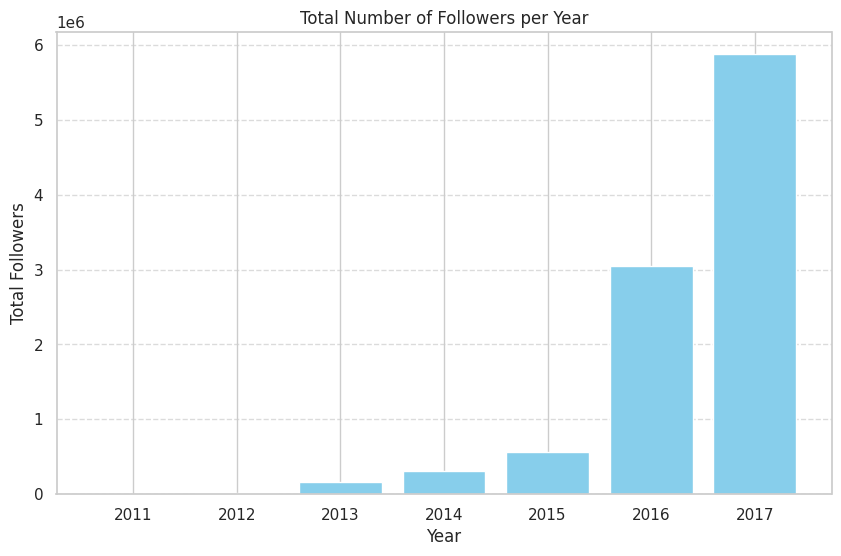

In [39]:
import matplotlib.pyplot as plt

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(followers_per_year['Year'], followers_per_year['Total_Followers'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Followers')
plt.title('Total Number of Followers per Year')
plt.xticks(followers_per_year['Year'])  # Ensure all years are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [40]:
import pandas as pd

# Assuming your dataset is loaded into a DataFrame called df
df['modified_at'] = pd.to_datetime(df['modified_at'], unit='s')  # Convert to datetime
df['year'] = df['modified_at'].dt.year  # Extract year

# Filter for 2016 data
df_2016 = df[df['year'] == 2016]

# Group by artist and sum their followers
top_artists_2016 = df_2016.groupby('artist_name')['num_followers'].sum().reset_index()

# Sort by followers and get the top 10 artists
top_10_artists_2016 = top_artists_2016.sort_values(by='num_followers', ascending=False).head(10)

# Display the result
print(top_10_artists_2016)


          artist_name  num_followers
31514     Wiz Khalifa        1632838
8133            Drake          62138
30307   Ty Dolla $ign          16786
31515      Wiz Taylor          14827
20787          ODESZA          14346
4210            BØRNS          13942
598    Adventure Club          13295
16115    Lana Del Rey          11987
11443          Halsey           8816
15813            Kygo           8544


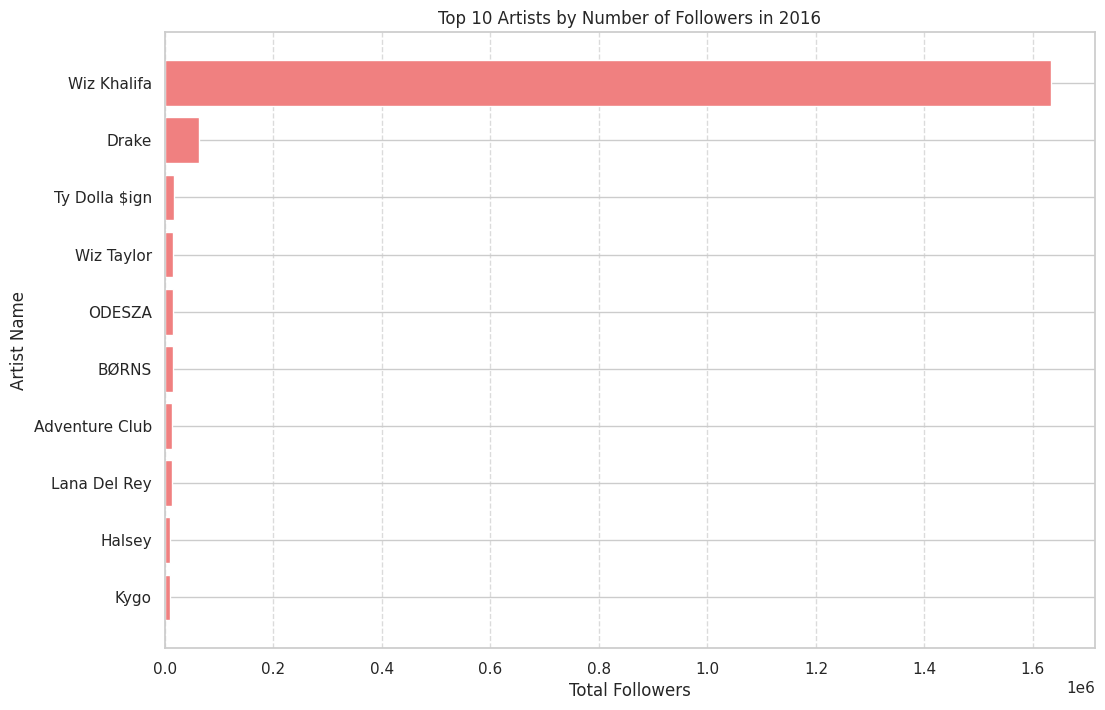

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataset is loaded into a DataFrame called df
df = pd.read_csv('spotify_data.csv')

df['modified_at'] = pd.to_datetime(df['modified_at'], unit='s')  # Convert to datetime
df['year'] = df['modified_at'].dt.year  # Extract year

# Filter for 2016 data
df_2016 = df[df['year'] == 2016]

# Group by artist and sum their followers
top_artists_2016 = df_2016.groupby('artist_name')['num_followers'].sum().reset_index()

# Sort by followers and get the top 10 artists
top_10_artists_2016 = top_artists_2016.sort_values(by='num_followers', ascending=False).head(10)
# Plotting the bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_10_artists_2016['artist_name'], top_10_artists_2016['num_followers'], color='lightcoral')
plt.xlabel('Total Followers')
plt.ylabel('Artist Name')
plt.title('Top 10 Artists by Number of Followers in 2016')
plt.gca().invert_yaxis()  # To display the top artist at the top of the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [42]:
import pandas as pd

# Assuming your dataset is loaded into a DataFrame called df
df['modified_at'] = pd.to_datetime(df['modified_at'], unit='s')  # Convert to datetime
df['year'] = df['modified_at'].dt.year  # Extract the year

# Filter for the year 2016
df_2016 = df[df['year'] == 2016]

# Group by playlist and sum their followers
top_playlists_2016 = df_2016.groupby('playlist_name')['num_followers'].sum().reset_index()

# Sort by followers and get the top 10 playlists
top_10_playlists_2016 = top_playlists_2016.sort_values(by='num_followers', ascending=False).head(10)

# Display the result
print(top_10_playlists_2016)


          playlist_name  num_followers
3886        Wiz Khalifa        1703403
3439          Summer 16         158643
5768             travel          44160
305               Alice          42958
1146  Desiigner — Panda          16076
983   Country Christmas          11644
976             Country          11638
847           Christmas           8973
704          COPENHAGEN           8281
5765               trap           8172


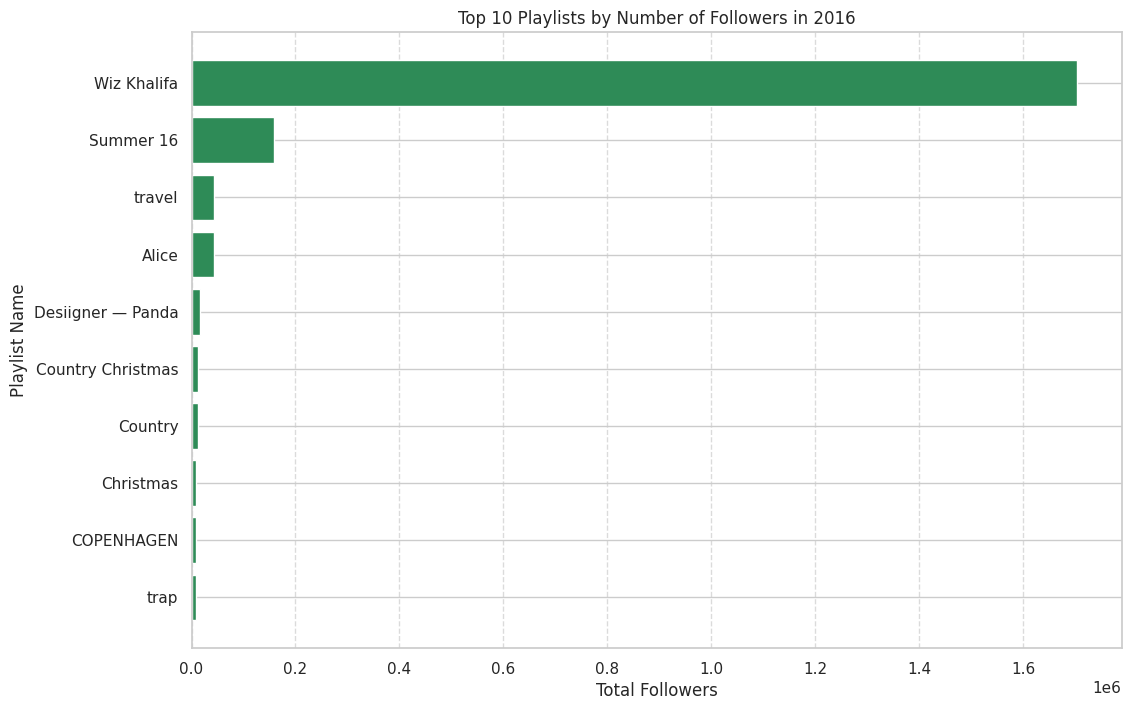

In [43]:
import matplotlib.pyplot as plt

# Plotting the bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_10_playlists_2016['playlist_name'], top_10_playlists_2016['num_followers'], color='seagreen')
plt.xlabel('Total Followers')
plt.ylabel('Playlist Name')
plt.title('Top 10 Playlists by Number of Followers in 2016')
plt.gca().invert_yaxis()  # To display the top playlist at the top of the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [44]:
import pandas as pd

df = pd.read_csv('spotify_data.csv')

# Assuming your dataset is loaded into a DataFrame called df
df['modified_at'] = pd.to_datetime(df['modified_at'], unit='s')  # Convert to datetime
df['year'] = df['modified_at'].dt.year  # Extract the year

# Filter for the year 2016
df_2016 = df[df['year'] == 2016]

# Group by track and sum their followers
top_tracks_2016 = df_2016.groupby('track_name')['num_followers'].sum().reset_index()

# Sort by followers and get the top 10 tracks
top_10_tracks_2016 = top_tracks_2016.sort_values(by='num_followers', ascending=False).head(10)

# Display the result
print(top_10_tracks_2016)


                                               track_name  num_followers
39813                                             Goodbye          30074
120692  You And Your Friends (feat. Snoop Dogg & Ty Do...          29792
95944                                Stayin Out All Night          29752
92995                          So High (feat. Ghost Loft)          29715
98142                                           Superstar          29675
55300                    KK (feat. Project Pat & Juicy J)          29664
62237                                        Lose Control          29656
115021  We Dem Boyz Remix (feat. Rick Ross, ScHoolboy ...          29633
107422                                         This Plane          29633
18580                                               Chewy          29626


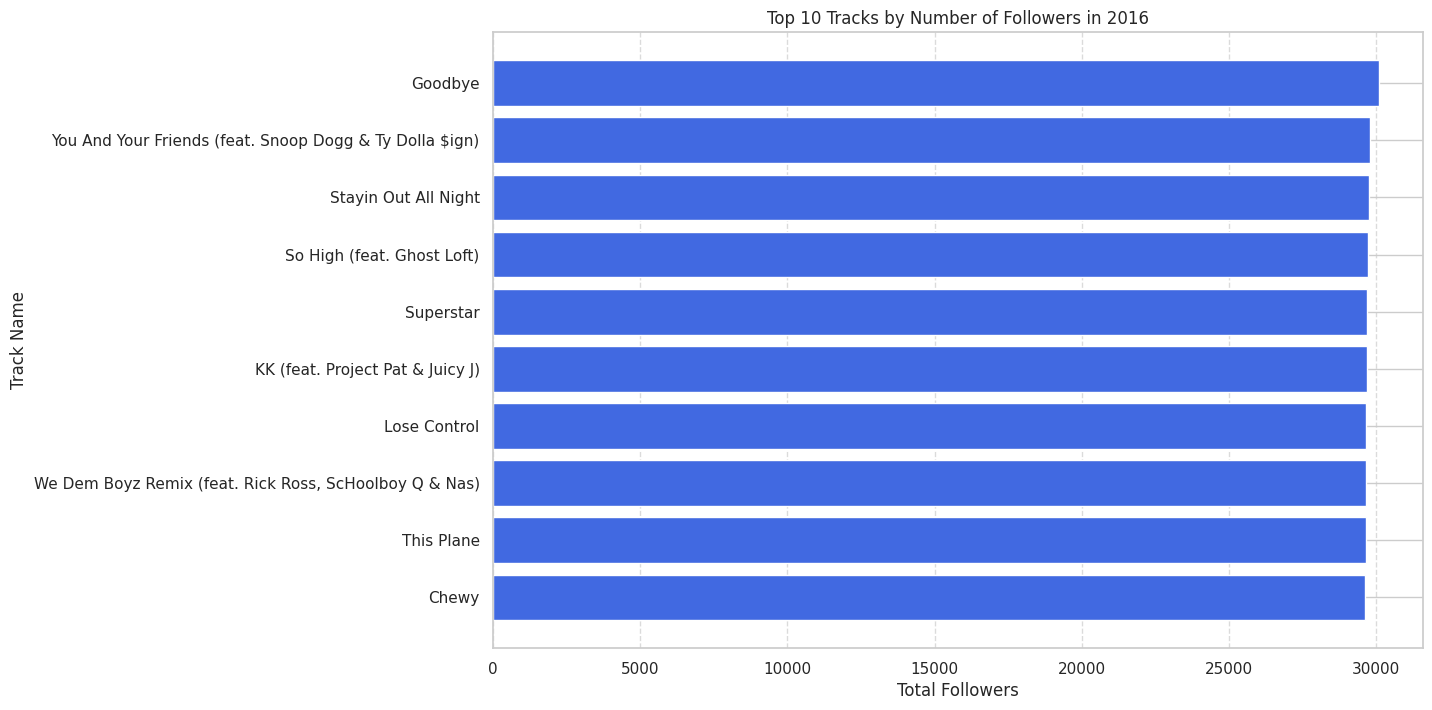

In [45]:
import matplotlib.pyplot as plt

# Plotting the bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_10_tracks_2016['track_name'], top_10_tracks_2016['num_followers'], color='royalblue')
plt.xlabel('Total Followers')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks by Number of Followers in 2016')
plt.gca().invert_yaxis()  # To display the top track at the top of the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [46]:
import pandas as pd

df = pd.read_csv('spotify_data.csv')

# Assuming your dataset is loaded into a DataFrame called df
# Filter for New York
df_ny = df[df['playlist_name'] == 'New York']

# Group by artist and sum their followers
top_artists_ny = df_ny.groupby('artist_name')['num_followers'].sum().reset_index()

# Sort by followers and get the top 10 artists
top_10_artists_ny = top_artists_ny.sort_values(by='num_followers', ascending=False).head(10)

# Display the result
print(top_10_artists_ny)


             artist_name  num_followers
9                 Avicii              4
21              Coldplay              4
65                  Kygo              4
114     The Chainsmokers              3
89   Panic! At The Disco              3
8               Astrid S              3
83           MisterWives              3
0          A R I Z O N A              2
72           Lostboycrow              2
48              Galantis              2


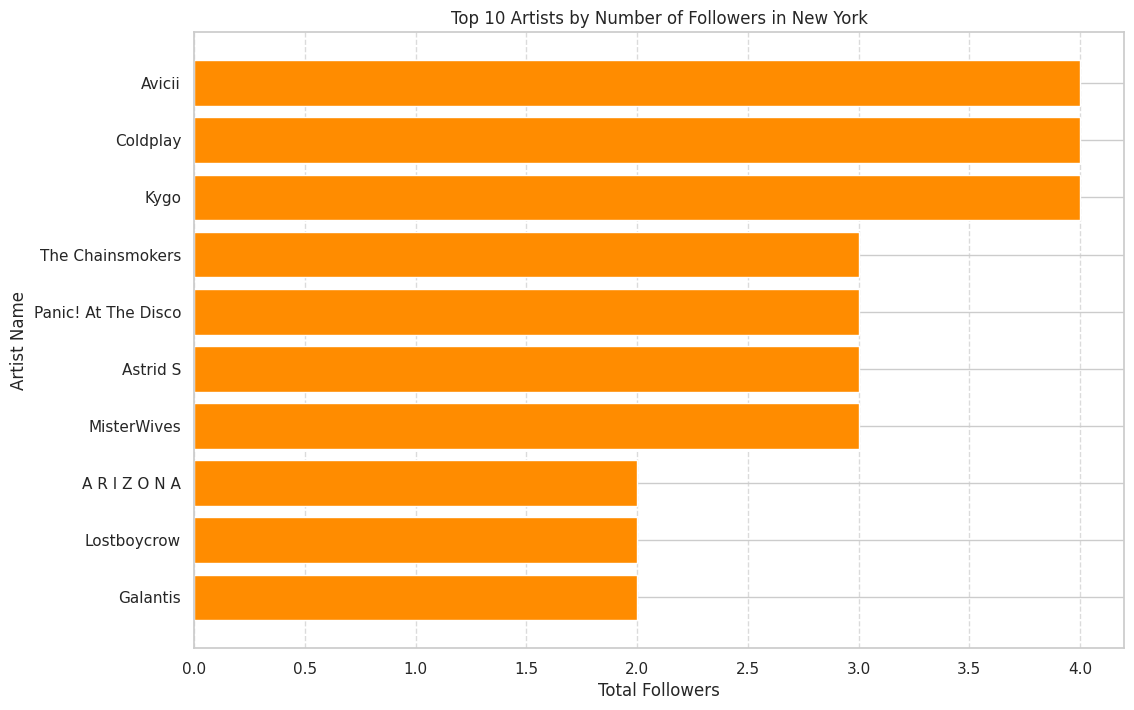

In [47]:
import matplotlib.pyplot as plt

# Plotting the bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_10_artists_ny['artist_name'], top_10_artists_ny['num_followers'], color='darkorange')
plt.xlabel('Total Followers')
plt.ylabel('Artist Name')
plt.title('Top 10 Artists by Number of Followers in New York')
plt.gca().invert_yaxis()  # To display the top artist at the top of the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [48]:
import pandas as pd

# Load the actual data
df = pd.read_csv('spotify_data.csv')

# Filter for Wiz Khalifa
df_wiz = df[df['artist_name'] == 'Wiz Khalifa']

# Sort by number of followers and get the top 5 tracks
top_5_tracks_wiz = df_wiz.sort_values(by='num_followers', ascending=False).head(5)

# Display the result
print(top_5_tracks_wiz)


        playlist_name  collaborative  modified_at  num_tracks  num_albums  \
1703952   Wiz Khalifa          False   1459209600         115          21   
1703960   Wiz Khalifa          False   1459209600         115          21   
1703962   Wiz Khalifa          False   1459209600         115          21   
1703963   Wiz Khalifa          False   1459209600         115          21   
1703964   Wiz Khalifa          False   1459209600         115          21   

         num_followers  num_edits  track_pos  artist_name  \
1703952          14812          8         20  Wiz Khalifa   
1703960          14812          8         28  Wiz Khalifa   
1703962          14812          8         30  Wiz Khalifa   
1703963          14812          8         31  Wiz Khalifa   
1703964          14812          8         32  Wiz Khalifa   

                                    album_uri     album_name  \
1703952  spotify:album:1XCdNQ4u8CXWVA8cJEDgV8  Flight School   
1703960  spotify:album:5S4SuPHbaozi5PDedAO

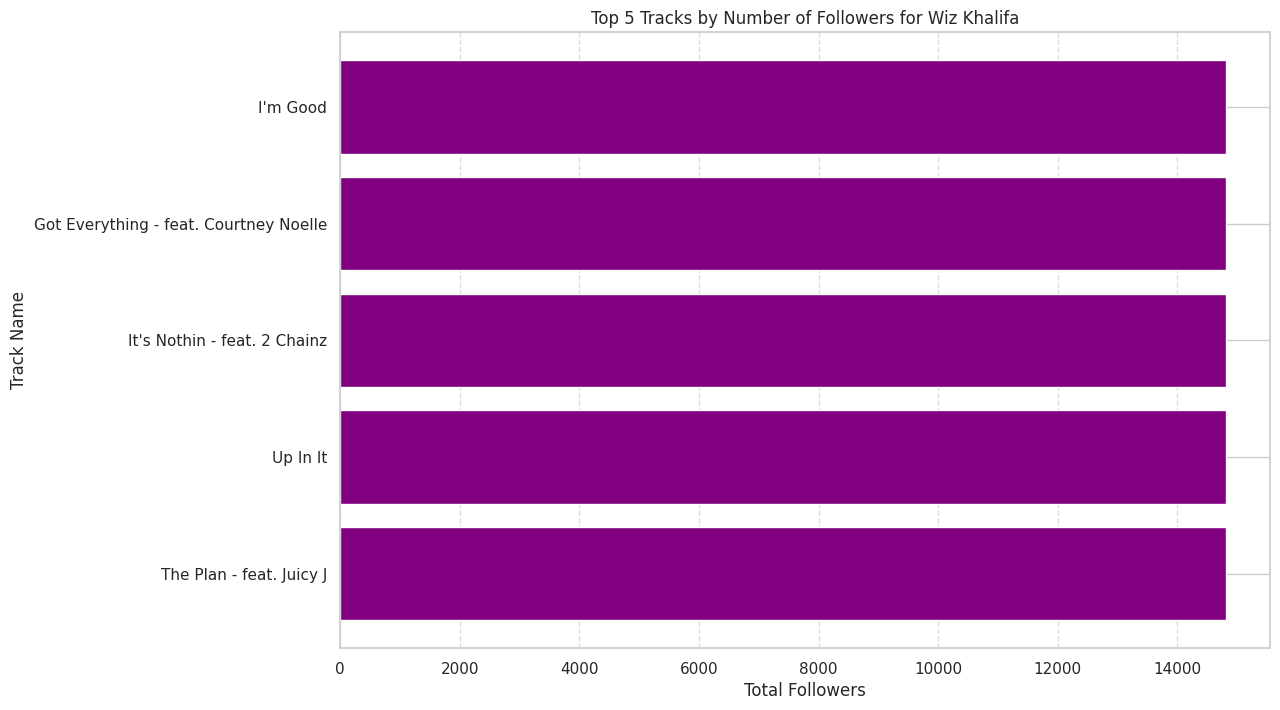

In [49]:
import matplotlib.pyplot as plt

# Plotting the bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_5_tracks_wiz['track_name'], top_5_tracks_wiz['num_followers'], color='purple')
plt.xlabel('Total Followers')
plt.ylabel('Track Name')
plt.title('Top 5 Tracks by Number of Followers for Wiz Khalifa')
plt.gca().invert_yaxis()  # To display the top track at the top of the plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [50]:
!pip install streamlit

In [51]:
!npm install localtunnel


up to date, audited 23 packages in 1s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [52]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.75.35.87


In [53]:
# run streamlit server in backgound
!streamlit run  app.py&>/content/logs.txt & npx localtunnel --port 8501

your url is: https://thick-taxes-tickle.loca.lt
^C


In [ ]:
#APP.PY
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('spotify_data.csv')

# Convert 'modified_at' to datetime and extract the year
df['modified_at'] = pd.to_datetime(df['modified_at'], unit='s')
df['year'] = df['modified_at'].dt.year

# Set Seaborn style
sns.set(style="whitegrid")

# Sidebar for navigation
st.sidebar.title("Navigation")
options = st.sidebar.radio("Go to",
    ['Number of Followers Per Year',
     'Top 10 Artists by Number of Followers in 2016',
     'Top 10 Playlists by Number of Followers in 2016',
     'Top 10 Tracks by Number of Followers in 2016',
     'Top 10 Artists in New York',
     'Top 5 Tracks of Wiz Khalifa'])

# Number of Followers Per Year
if options == 'Number of Followers Per Year':
    st.title('Number of Followers Per Year')
    followers_per_year = df.groupby('year')['num_followers'].sum().reset_index()
    followers_per_year.columns = ['Year', 'Total_Followers']

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(x='Year', y='Total_Followers', data=followers_per_year, marker='o', ax=ax)
    ax.set_xlabel('Year')
    ax.set_ylabel('Total Followers')
    ax.set_title('Followers Growth Over Years')

    st.pyplot(fig)

# Top 10 Artists by Number of Followers in 2016
elif options == 'Top 10 Artists by Number of Followers in 2016':
    st.title('Top 10 Artists by Number of Followers in 2016')
    df_2016 = df[df['year'] == 2016]
    top_10_artists_2016 = df_2016.groupby('artist_name')['num_followers'].sum().reset_index()
    top_10_artists_2016 = top_10_artists_2016.sort_values(by='num_followers', ascending=False).head(10)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='num_followers', y='artist_name', data=top_10_artists_2016, palette='coolwarm', ax=ax)
    ax.set_xlabel('Number of Followers')
    ax.set_ylabel('Artist Name')
    ax.set_title('Top 10 Artists in 2016')
    ax.invert_yaxis()

    st.pyplot(fig)

# Top 10 Playlists by Number of Followers in 2016
elif options == 'Top 10 Playlists by Number of Followers in 2016':
    st.title('Top 10 Playlists by Number of Followers in 2016')
    df_2016 = df[df['year'] == 2016]
    top_10_playlists_2016 = df_2016.groupby('playlist_name')['num_followers'].sum().reset_index()
    top_10_playlists_2016 = top_10_playlists_2016.sort_values(by='num_followers', ascending=False).head(10)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='num_followers', y='playlist_name', data=top_10_playlists_2016, palette='coolwarm', ax=ax)
    ax.set_xlabel('Number of Followers')
    ax.set_ylabel('Playlist Name')
    ax.set_title('Top 10 Playlists in 2016')

    st.pyplot(fig)

# Top 10 Tracks by Number of Followers in 2016
elif options == 'Top 10 Tracks by Number of Followers in 2016':
    st.title('Top 10 Tracks by Number of Followers in 2016')
    df_2016 = df[df['year'] == 2016]
    top_10_tracks_2016 = df_2016.groupby('track_name')['num_followers'].sum().reset_index()
    top_10_tracks_2016 = top_10_tracks_2016.sort_values(by='num_followers', ascending=False).head(10)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='num_followers', y='track_name', data=top_10_tracks_2016, palette='coolwarm', ax=ax)
    ax.set_xlabel('Number of Followers')
    ax.set_ylabel('Track Name')
    ax.set_title('Top 10 Tracks in 2016')

    st.pyplot(fig)

# Top 10 Artists in New York
elif options == 'Top 10 Artists in New York':
    st.title('Top 10 Artists by Number of Followers in New York')
    top_10_artists_ny = df[df['playlist_name'] == 'New York'].groupby('artist_name')['num_followers'].sum().reset_index()
    top_10_artists_ny = top_10_artists_ny.sort_values(by='num_followers', ascending=False).head(10)

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.barplot(x='num_followers', y='artist_name', data=top_10_artists_ny, palette='plasma', ax=ax)
    ax.set_xlabel('Number of Followers')
    ax.set_ylabel('Artist Name')
    ax.set_title('Top 10 Artists in New York')

    st.pyplot(fig)

# Top 5 Tracks of Wiz Khalifa
elif options == 'Top 5 Tracks of Wiz Khalifa':
    st.title('Top 5 Tracks of Wiz Khalifa')
    top_5_tracks_wiz = df[df['artist_name'] == 'Wiz Khalifa'].sort_values(by='num_followers', ascending=False).head(5)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='num_followers', y='track_name', data=top_5_tracks_wiz, palette='viridis', ax=ax)
    ax.set_xlabel('Number of Followers')
    ax.set_ylabel('Track Name')
    ax.set_title('Top 5 Tracks of Wiz Khalifa')

    st.pyplot(fig)
